In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from transformers import BertTokenizer, BertModel
import torch 
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA 

In [2]:
# Download punkt for tokenization if not done already
nltk.download('all')

NameError: name 'nltk' is not defined

### Load Text Files into a DataFrame
#### Each file is treated as an individual document, and we store its content and filename in a Pandas DataFrame.
##### This reads all .txt files in the given folder.
##### It stores file names and content in a Pandas DataFrame.
##### The df.head() command helps verify if data is loaded correctly.

In [5]:
import os
import pandas as pd

# Define the folder path where the text files are stored
folder_path = "./Datasets"  # Update with your actual folder path

texts = []  # List to store text content
filenames = []  # List to store corresponding filenames

# Process all .txt files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):  # Only process text files
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r", encoding="utf-8") as file:
            texts.append(file.read())  # Read text content
            filenames.append(filename)  # Store filename

# Print summary
print(f"Loaded {len(texts)} text files.")

# Create DataFrame to store file contents
df = pd.DataFrame({"filename": filenames, "text": texts})

# Display the first few rows
print(df.head())

Loaded 50 text files.
                                      filename  \
0  15 Keller Williams.pdf-all_items_item_5.txt   
1               3 KFC.pdf-all_items_item_5.txt   
2        24 Applebees.pdf-all_items_item_5.txt   
3           45 Zaxbys.pdf-all_items_item_5.txt   
4     42 Jimmy John's.pdf-all_items_item_5.txt   

                                                text  
0  ITEM 5\nINITIAL FEES\n\nInitial Franchise Fee:...  
1  ITEM 5\nINITIAL FEES\nFranchise Agreement\nIni...  
2  ITEM 5\nINITIAL FEES\n\n\nApplicant’s Fee.  Yo...  
3  ITEM 5\nINITIAL FEES\nInitial Franchise Fee.  ...  
4  ITEM 5\nINITIAL FEES\nInitial Franchise Fee\nY...  


### Load Panera Bread Text File
#### Reading all contents of the txt file

In [7]:
import os

# Define the folder path where the files are stored
folder_path = "./Datasets"  # Update with your actual folder path
target_filename = "17 Panera Bread.pdf-all_items_item_5"  # Name of the file to find

# Search for the file in the folder
found_file = None
for filename in os.listdir(folder_path):
    if target_filename in filename and filename.endswith(".txt"):  # Ensure it's a .txt file
        found_file = os.path.join(folder_path, filename)
        break  # Stop searching after finding the first match

# Display file contents if found
if found_file:
    with open(found_file, "r", encoding="utf-8") as file:
        content = file.read()
        print(f"Contents of {filename}:\n")
        print(content)  # Display the full content of the file
else:
    print(f"File '{target_filename}' not found in '{folder_path}'.")

Contents of 17 Panera Bread.pdf-all_items_item_5.txt:

ITEM 5
INITIAL FEES
Area Development Agreement.

Under the Area Development Agreement, you must pay a development fee of five thousand dollars ($5,000) (the “Development
Fee”) for each Panera Bread Bakery-Cafe that may be opened under the Area Development Agreement.  The number of Panera Bread
Bakery-Cafes that you may develop under a particular Area Development Agreement is determined by mutual agreement.  The number of
Panera Bread Bakery-Cafes will vary depending upon a variety of factors, including: (1) existing population and anticipated population growth
within the Development Area; (2) competition within the Development Area; (3) the availability of acceptable locations; and (4) the number
of Panera Bread Bakery-Cafes we estimate can be developed within the Development Area.

The initial franchise fee payable for each Panera Bread Bakery-Cafe you are required to develop under an Area Development
Agreement is thirty-five thou

In [9]:
# --- Step 3: Function to generate word cloud ---
def plot_word_cloud(lda_model, vectorizer, title):
    """Generate and plot word cloud from LDA topics."""
    topics = lda_model.components_
    feature_names = vectorizer.get_feature_names_out()

    topic_words = {feature_names[i]: topics[0][i] for i in topics[0].argsort()[-50:]}  # Top 50 words
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(topic_words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

#### Word Cloud Visualizations 
##### Bag of Words (BoW)
##### N-Gram
##### Term Frequency-Inverse Document Frequency (TF-IDF)

Topics from Bag of Words (BoW):
Topic #0:  ['vt', 'development', 'franchise', 'va', 'nj', 'dunkin', 'fee', 'initial', 'ny', 'restaurant']
Topic #1:  ['sign', 'program', 'pay', '000', 'initial', 'restaurant', 'development', 'agreement', 'fee', 'franchise']
Topic #2:  ['pay', 'fees', 'agreement', 'program', '000', 'training', 'center', 'initial', 'franchise', 'fee']
Topic #3:  ['conversion', 'including', 'products', 'pay', 'development', 'fee', 'license', '000', 'center', 'viocf']
Topic #4:  ['000', 'midas', 'incentive', 'program', 'initial', 'restaurant', 'development', 'fee', 'agreement', 'franchise']


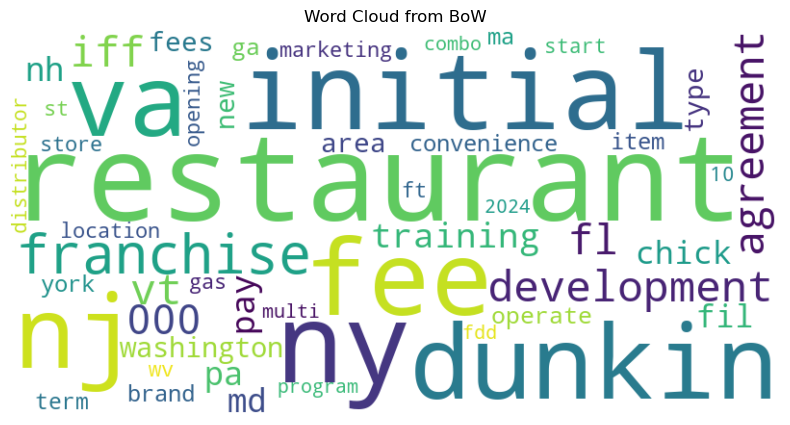

In [11]:
# --- Step 4: Bag of Words (BoW) ---
vectorizer_bow = CountVectorizer(stop_words='english')
X_bow = vectorizer_bow.fit_transform(df['text'])

lda_bow = LDA(n_components=5, random_state=42)
lda_bow.fit(X_bow)

print("Topics from Bag of Words (BoW):")
for idx, topic in enumerate(lda_bow.components_):
    print(f"Topic #{idx}: ", [vectorizer_bow.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

plot_word_cloud(lda_bow, vectorizer_bow, "Word Cloud from BoW")


Topics from N-grams:
Topic #0:  ['30 000', 'pay initial', '10 000', 'sign franchise', 'midas shop', 'development agreement', 'area development', 'franchise agreement', 'initial franchise', 'franchise fee']
Topic #1:  ['program sign', '31 2025', 'sign franchise', 'incentive program', 'store development', 'development fee', 'development agreement', 'franchise fee', 'franchise agreement', 'initial franchise']
Topic #2:  ['initial fees', 'development fee', 'initial license', 'incentive program', 'license fee', 'initial franchise', 'traditional restaurant', 'franchise agreement', 'franchise fee', 'development agreement']
Topic #3:  ['circle business', 'impact study', 'sign franchise', 'franchised restaurant', 'development incentive', 'development agreement', 'incentive program', 'franchise agreement', 'franchise fee', 'initial franchise']
Topic #4:  ['area type', 'disclosure document', 'development area', 'training fee', 'chick fil', 'development agreement', 'assistance fee', 'technical as

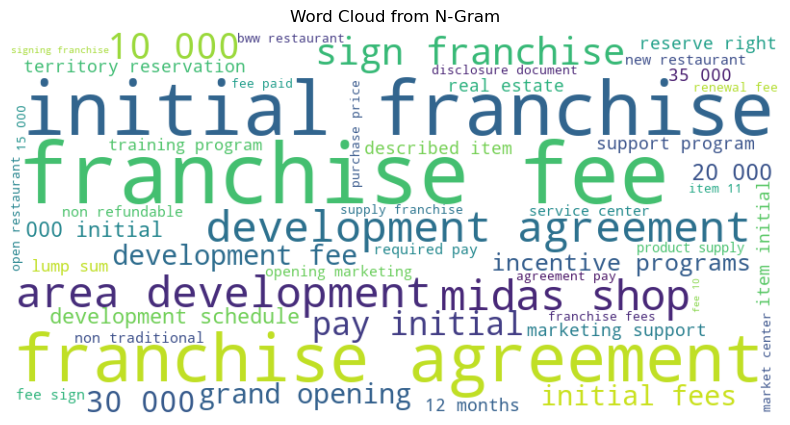

In [13]:
# --- Step 5: N-Gram (Bigrams) ---
vectorizer_ngram = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_ngram = vectorizer_ngram.fit_transform(df['text'])

lda_ngram = LDA(n_components=5, random_state=42)
lda_ngram.fit(X_ngram)

print("\nTopics from N-grams:")
for idx, topic in enumerate(lda_ngram.components_):
    print(f"Topic #{idx}: ", [vectorizer_ngram.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

plot_word_cloud(lda_ngram, vectorizer_ngram, "Word Cloud from N-Gram")


Topics from TF-IDF:
Topic #0:  ['poultry', 'produced', 'licensed', 'ingredients', 'chicken', 'bay', 'cfa', 'distributor', 'fil', 'chick']
Topic #1:  ['program', 'training', 'pay', '000', 'agreement', 'development', 'restaurant', 'initial', 'fee', 'franchise']
Topic #2:  ['brokerage', 'nh', 'pa', 'md', 'vt', 'ny', 'va', 'nj', 'dunkin', 'bhhs']
Topic #3:  ['1982', 'statistics', '428680407', '1984', 'index', 'annually', 'consumers', 'labor', 'inflation', 'cpi']
Topic #4:  ['phllc', 'consumer', 'bhhs', 'agents', 'restricted', 'kiosks', 'salespersons', 'subdivision', '5012023', 'brokers']


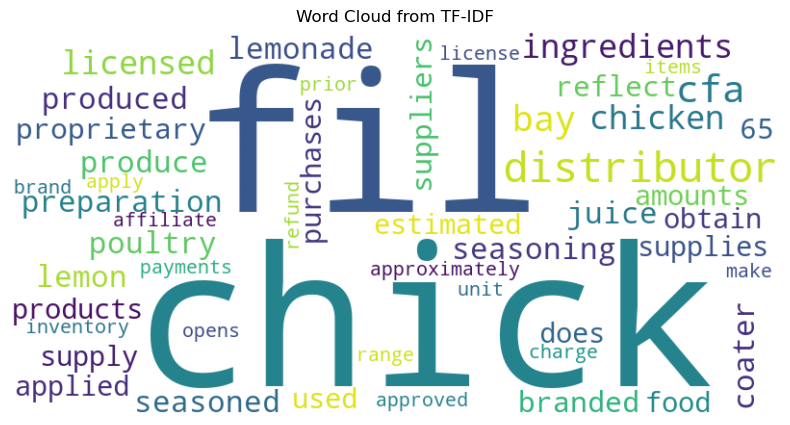

In [15]:
# --- Step 6: TF-IDF ---
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer_tfidf.fit_transform(df['text'])

lda_tfidf = LDA(n_components=5, random_state=42)
lda_tfidf.fit(X_tfidf)

print("\nTopics from TF-IDF:")
for idx, topic in enumerate(lda_tfidf.components_):
    print(f"Topic #{idx}: ", [vectorizer_tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

plot_word_cloud(lda_tfidf, vectorizer_tfidf, "Word Cloud from TF-IDF")

In [17]:
# --- Step 7: Cosine Similarity Models ---
from sklearn.metrics.pairwise import cosine_similarity

# --- Bag of Words Cosine Similarity ---
cosine_sim_bow = cosine_similarity(X_bow)
print("\nCosine Similarity (BoW):")
print(cosine_sim_bow)

# --- N-Gram Cosine Similarity ---
cosine_sim_ngram = cosine_similarity(X_ngram)
print("\nCosine Similarity (N-grams):")
print(cosine_sim_ngram)

# --- TF-IDF Cosine Similarity ---
cosine_sim_tfidf = cosine_similarity(X_tfidf)
print("\nCosine Similarity (TF-IDF):")
print(cosine_sim_tfidf)


Cosine Similarity (BoW):
[[1.         0.39985998 0.51777583 ... 0.61264929 0.44888973 0.37778355]
 [0.39985998 1.         0.63719756 ... 0.44246001 0.61836396 0.48860945]
 [0.51777583 0.63719756 1.         ... 0.59735949 0.72090705 0.59736291]
 ...
 [0.61264929 0.44246001 0.59735949 ... 1.         0.47385553 0.51055629]
 [0.44888973 0.61836396 0.72090705 ... 0.47385553 1.         0.56126401]
 [0.37778355 0.48860945 0.59736291 ... 0.51055629 0.56126401 1.        ]]

Cosine Similarity (N-grams):
[[1.         0.1252296  0.17772003 ... 0.24658875 0.15121542 0.13355861]
 [0.1252296  1.         0.26867469 ... 0.1840648  0.27167597 0.18216956]
 [0.17772003 0.26867469 1.         ... 0.33893876 0.38276123 0.31627455]
 ...
 [0.24658875 0.1840648  0.33893876 ... 1.         0.24425276 0.24636935]
 [0.15121542 0.27167597 0.38276123 ... 0.24425276 1.         0.23812809]
 [0.13355861 0.18216956 0.31627455 ... 0.24636935 0.23812809 1.        ]]

Cosine Similarity (TF-IDF):
[[1.         0.12264581 0.2

#### Generate BERT Embeddings

In [19]:
texts = []  # List to store text content
filenames = []  # List to store corresponding filenames

# Process all .txt files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):  # Only process text files
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r", encoding="utf-8") as file:
            texts.append(file.read())  # Read text content
            filenames.append(filename)  # Store filename

# Create DataFrame to store file contents
df = pd.DataFrame({"filename": filenames, "text": texts})

#### TF-IDF Vectorization


Topics from TF-IDF:
Topic #1:  ['poultry', 'produced', 'licensed', 'ingredients', 'chicken', 'bay', 'cfa', 'distributor', 'fil', 'chick']
Topic #2:  ['program', 'training', 'pay', '000', 'agreement', 'development', 'restaurant', 'initial', 'fee', 'franchise']
Topic #3:  ['brokerage', 'nh', 'pa', 'md', 'vt', 'ny', 'va', 'nj', 'dunkin', 'bhhs']
Topic #4:  ['1982', 'statistics', '428680407', '1984', 'index', 'annually', 'consumers', 'labor', 'inflation', 'cpi']
Topic #5:  ['phllc', 'consumer', 'bhhs', 'agents', 'restricted', 'kiosks', 'salespersons', 'subdivision', '5012023', 'brokers']


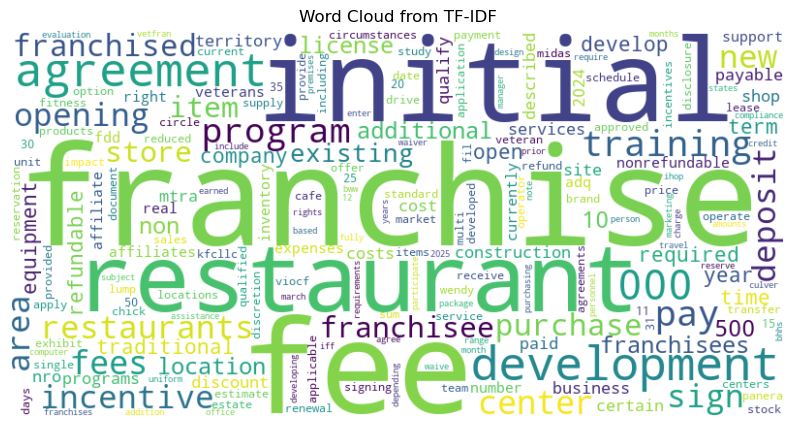

In [21]:
# --- Step 4: TF-IDF ---
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer_tfidf.fit_transform(df['text'])

# --- Step 5: LDA Topic Modeling ---
lda_tfidf = LDA(n_components=5, random_state=42)  # Let's assume we want 5 topics
lda_tfidf.fit(X_tfidf)

# Output the topics from TF-IDF
print("\n" + "="*50)
print("Topics from TF-IDF:")
print("="*50)
for idx, topic in enumerate(lda_tfidf.components_):
    print(f"Topic #{idx+1}: ", [vectorizer_tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

# --- Optional: Plot Word Cloud from TF-IDF ---
def plot_word_cloud(lda_model, vectorizer, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
        dict(zip(vectorizer.get_feature_names_out(), lda_model.components_.sum(axis=0))))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

# Call the word cloud plot function
plot_word_cloud(lda_tfidf, vectorizer_tfidf, "Word Cloud from TF-IDF")

In [60]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Path to your folder containing .txt files
folder_path = './Datasets'

texts = []  # List to store text content
filenames = []  # List to store corresponding filenames

# Process all .txt files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):  # Only process text files
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r", encoding="utf-8") as file:
            texts.append(file.read())  # Read text content
            filenames.append(filename)  # Store filename

# Create DataFrame to store file contents
df = pd.DataFrame({"filename": filenames, "text": texts})

# --- Step 1: TF-IDF Vectorization ---
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer_tfidf.fit_transform(df['text'])

# --- Step 2: LDA Topic Modeling ---
lda_tfidf = LDA(n_components=5, random_state=42)  # Assume 5 topics
lda_tfidf.fit(X_tfidf)

# --- Step 3: Assign Topics to Files ---
topic_assignments = lda_tfidf.transform(X_tfidf)
df['assigned_topic'] = topic_assignments.argmax(axis=1)

# --- Step 4: Output Formatting and Results ---
print("\n" + "="*50)
print("Topics from LDA and Corresponding Files:")
print("="*50)

# Output each topic and the filenames assigned to it
for idx, topic in enumerate(lda_tfidf.components_):
    assigned_files = df[df['assigned_topic'] == idx]['filename'].tolist()
    
    if assigned_files:
        print(f"\n--- Topic #{idx + 1} ---")
        topic_words = [vectorizer_tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
        print(f"Top words: {', '.join(topic_words)}")
        print(f"Files assigned to this topic: \n" + "\n".join(assigned_files))
    else:
        print(f"\n--- Topic #{idx + 1} ---")
        print("No files assigned to this topic.")


Topics from LDA and Corresponding Files:

--- Topic #1 ---
Top words: poultry, produced, licensed, ingredients, chicken, bay, cfa, distributor, fil, chick
Files assigned to this topic: 
6 Chick-fil-A.pdf-all_items_item_5.txt

--- Topic #2 ---
Top words: program, training, pay, 000, agreement, development, restaurant, initial, fee, franchise
Files assigned to this topic: 
15 Keller Williams.pdf-all_items_item_5.txt
3 KFC.pdf-all_items_item_5.txt
24 Applebees.pdf-all_items_item_5.txt
45 Zaxbys.pdf-all_items_item_5.txt
42 Jimmy John's.pdf-all_items_item_5.txt
32 Servpro.pdf-all_items_item_5.txt
20 Sonic Drive-In.pdf-all_items_item_5.txt
46 Carl's Jr..pdf-all_items_item_5.txt
47 Baskin Robbins.pdf-all_items_item_5.txt
1 McDonald's.pdf-all_items_item_5.txt
5 Ace Hardware.pdf-all_items_item_5.txt
36 Denny's.pdf-all_items_item_5.txt
40 Paris Baguette.pdf-all_items_item_5.txt
28 Buffalo Wild Wings.pdf-all_items_item_5.txt
30 Berkshire Hathaway.pdf-all_items_item_5.txt
4 Burger King.pdf-all_it

In [64]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Path to your folder containing .txt files
folder_path = './Datasets'

texts = []  # List to store text content
filenames = []  # List to store corresponding filenames

# Process all .txt files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):  # Only process text files
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r", encoding="utf-8") as file:
            texts.append(file.read())  # Read text content
            filenames.append(filename)  # Store filename

# Create DataFrame to store file contents
df = pd.DataFrame({"filename": filenames, "text": texts})

# --- Step 1: TF-IDF Vectorization ---
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer_tfidf.fit_transform(df['text'])

# --- Step 2: Clustering with K-means ---
scaler = StandardScaler(with_mean=False)  # Don't center the TF-IDF matrix
X_scaled = scaler.fit_transform(X_tfidf)

# Set the number of clusters (you can adjust this based on your data)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# --- Step 3: Assign Clusters to Files ---
df['assigned_cluster'] = kmeans.labels_

# --- Step 4: Output Clustering Results ---
print("\n" + "="*50)
print("Clusters from K-means and Corresponding Files (Based on TF-IDF):")
print("="*50)

# Output each cluster and the filenames assigned to it along with keywords
for idx in range(n_clusters):
    assigned_files = df[df['assigned_cluster'] == idx]['filename'].tolist()
    
    if assigned_files:
        print(f"\n--- Cluster #{idx + 1} ---")
        
        # Get indices of documents in this cluster
        cluster_indices = df[df['assigned_cluster'] == idx].index.tolist()
        
        # Extract the corresponding TF-IDF rows for the cluster
        cluster_tfidf = X_tfidf[cluster_indices, :]
        
        # Sum up the TF-IDF scores for each word across the cluster
        tfidf_sum = cluster_tfidf.sum(axis=0).A1  # .A1 flattens the sparse matrix to an array
        
        # Get the indices of the top 10 words by TF-IDF score
        top_keywords_idx = tfidf_sum.argsort()[::-1][:10]  # Sort and get the top 10
        
        # Print top keywords for the cluster
        print("\nTop Keywords for Cluster:")
        top_keywords = [vectorizer_tfidf.get_feature_names_out()[i] for i in top_keywords_idx]
        print(", ".join(top_keywords))
        
        # Print files assigned to the current cluster
        print(f"Files assigned to this cluster: \n" + "\n".join(assigned_files))
    else:
        print(f"\n--- Cluster #{idx + 1} ---")
        print("No files assigned to this cluster.")



Clusters from K-means and Corresponding Files (Based on TF-IDF):

--- Cluster #1 ---

Top Keywords for Cluster:
plans, fitness, development, area, planet, construction, franchise, equipment, fee, location
Files assigned to this cluster: 
29 Planet Fitness.pdf-all_items_item_5.txt

--- Cluster #2 ---

Top Keywords for Cluster:
popeyes, mtra, franchised, development, restaurant, incentive, franchise, program, minorities, women
Files assigned to this cluster: 
18 Popeyes Louisiana Kitchen.pdf-all_items_item_5.txt

--- Cluster #3 ---

Top Keywords for Cluster:
franchise, initial, fee, franchisees, pay, locations, satellite, prorated, term, restaurant
Files assigned to this cluster: 
1 McDonald's.pdf-all_items_item_5.txt

--- Cluster #4 ---

Top Keywords for Cluster:
franchise, fee, initial, restaurant, development, agreement, 000, training, pay, program
Files assigned to this cluster: 
15 Keller Williams.pdf-all_items_item_5.txt
3 KFC.pdf-all_items_item_5.txt
24 Applebees.pdf-all_items_it

In [48]:
import os
import pandas as pd
import torch
import numpy as np
from transformers import BertTokenizer, BertModel

# Path to your folder containing .txt files
folder_path = './Datasets'

texts = []  # List to store text content
filenames = []  # List to store corresponding filenames

# Process all .txt files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):  # Only process text files
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r", encoding="utf-8") as file:
            texts.append(file.read())  # Read text content
            filenames.append(filename)  # Store filename

# Create DataFrame to store file contents
df = pd.DataFrame({"filename": filenames, "text": texts})

# --- Step 1: BERT Embeddings ---
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(texts):
    bert_embeddings = []
    for sentence in texts:
        inputs = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        sentence_embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
        bert_embeddings.append(sentence_embedding)
    return np.array(bert_embeddings)

# Get BERT embeddings for the text data
bert_embeddings = get_bert_embeddings(df['text'])

# --- Output BERT Embeddings ---
print("\n" + "="*50)
print("BERT Embedding Values (First 5 values for each document):")
print("="*50)

for i, embedding in enumerate(bert_embeddings):
    print(f"\nDocument: {df['filename'][i]}")
    print(f"BERT Embedding (first 5 values): {embedding[:5]}")
    print("\n" + "-"*50)


BERT Embedding Values (First 5 values for each document):

Document: 15 Keller Williams.pdf-all_items_item_5.txt
BERT Embedding (first 5 values): [-0.23864312  0.10596299  0.42313194 -0.03994335  0.59677124]

--------------------------------------------------

Document: 3 KFC.pdf-all_items_item_5.txt
BERT Embedding (first 5 values): [-0.30147982  0.09533387  0.44100446 -0.2432273   0.62106985]

--------------------------------------------------

Document: 24 Applebees.pdf-all_items_item_5.txt
BERT Embedding (first 5 values): [-0.259488    0.12304947  0.32553834 -0.13007668  0.5361917 ]

--------------------------------------------------

Document: 45 Zaxbys.pdf-all_items_item_5.txt
BERT Embedding (first 5 values): [-0.2542436   0.06872962  0.38186103 -0.14136517  0.5956965 ]

--------------------------------------------------

Document: 42 Jimmy John's.pdf-all_items_item_5.txt
BERT Embedding (first 5 values): [-0.21232489  0.14088136  0.36333424 -0.10630398  0.5810996 ]

-------------

In [58]:
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Assuming the BERT embeddings from Block 1 are already loaded as `bert_embeddings`
# And the corresponding dataframe `df` is also available

# --- Step 2: Clustering with K-means ---
# Optional: You can scale the BERT embeddings if needed
scaler = StandardScaler()
bert_embeddings_scaled = scaler.fit_transform(bert_embeddings)

# Set the number of topics (clusters) for K-means (you can adjust this)
n_topics = 5
kmeans = KMeans(n_clusters=n_topics, random_state=42)
kmeans.fit(bert_embeddings_scaled)

# --- Step 3: Assign Topics to Files ---
df['assigned_topic'] = kmeans.labels_

# --- Step 4: TF-IDF for Extracting Keywords ---
# TF-IDF Vectorizer to extract keywords from the text
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer_tfidf.fit_transform(df['text'])

# Get feature names (keywords) from the TF-IDF vectorizer
feature_names = vectorizer_tfidf.get_feature_names_out()

# --- Step 5: Output Clustering Results with Keywords ---
print("\n" + "="*50)
print("Clusters from K-means and Corresponding Files (Based on BERT Embeddings):")
print("="*50)

# Output each cluster, filenames assigned to it, and top keywords for the cluster
for idx in range(n_topics):
    # Get the files assigned to this topic
    assigned_files = df[df['assigned_topic'] == idx]
    
    # Extract TF-IDF scores for the documents in this cluster
    cluster_tfidf = X_tfidf[assigned_files.index]  # Get TF-IDF for the documents in this cluster
    tfidf_sum = cluster_tfidf.sum(axis=0).A1  # Sum up the TF-IDF scores for each word across the cluster
    
    # Get the indices of the top 10 keywords by TF-IDF score
    top_keywords_idx = np.argsort(tfidf_sum)[::-1][:10]  # Sort the scores in descending order
    top_keywords = [feature_names[i] for i in top_keywords_idx]  # Get the top 10 keywords

    print(f"\n--- Cluster #{idx + 1} ---")
    print(f"Top Keywords for Cluster: {', '.join(top_keywords)}")
    
    for i, row in assigned_files.iterrows():
        filename = row['filename']
        print("\n" + "-"*50)
        print(f"- {df['filename'][i]}")
        
        # Show the first few lines of the document as a preview
        document_text = df['text'][i]
        preview_text = "\n".join(document_text.splitlines()[:5])  # First 5 lines as a preview
        print(f"  Preview: {preview_text}")
        print("\n" + "-"*50)


Clusters from K-means and Corresponding Files (Based on BERT Embeddings):

--- Cluster #1 ---
Top Keywords for Cluster: center, fee, store, initial, franchise, plans, fitness, development, market, area

--------------------------------------------------
- 15 Keller Williams.pdf-all_items_item_5.txt
  Preview: ITEM 5
INITIAL FEES

Initial Franchise Fee:  We currently charge an initial franchise fee of $35,000 for a Market Center
franchise, which includes $6,000 allocated to a subscription plan allowing certain of your personnel to

--------------------------------------------------

--------------------------------------------------
- 29 Planet Fitness.pdf-all_items_item_5.txt
  Preview: ITEM 5
INITIAL FEES
Except as discussed below, you will pay a lump-sum nonrefundable Initial Franchise Fee
of $20,000 when you sign the Franchise Agreement.  The Initial Franchise Fee is fully earned by
us when you sign the Franchise Agreement.  The Initial Franchise Fee is uniform and non-

----------

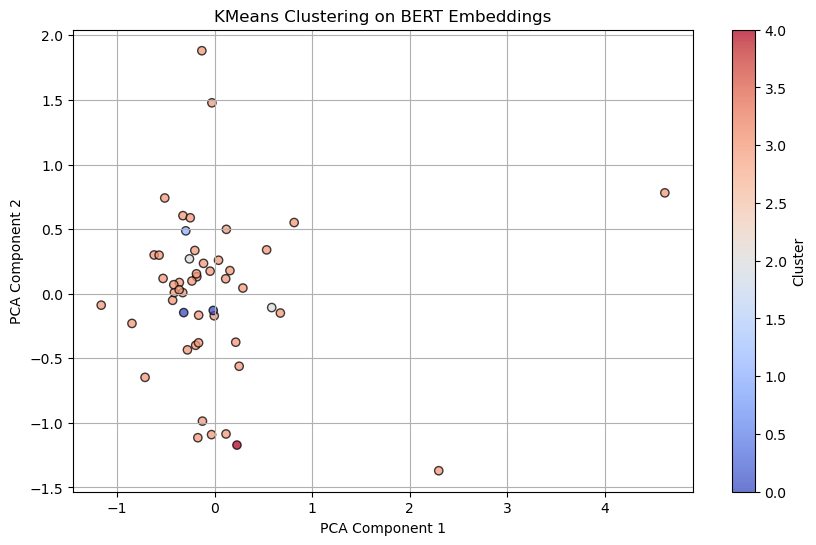

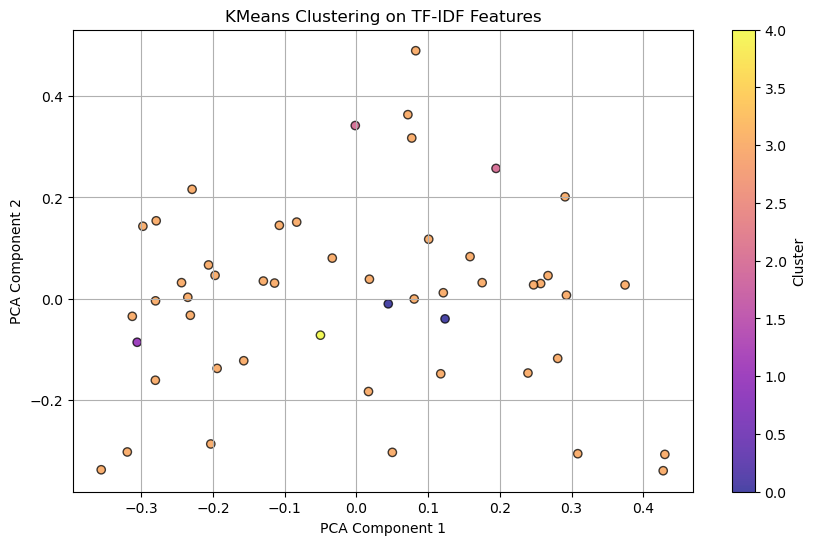

In [70]:
import os
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

# Path to your folder containing .txt files
folder_path = './Datasets'

texts = []  # List to store text content
filenames = []  # List to store corresponding filenames

# Process all .txt files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):  # Only process text files
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r", encoding="utf-8") as file:
            texts.append(file.read())  # Read text content
            filenames.append(filename)  # Store filename

# Create DataFrame to store file contents
df = pd.DataFrame({"filename": filenames, "text": texts})

# --- Step 1: BERT Embeddings ---
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(texts):
    bert_embeddings = []
    for sentence in texts:
        inputs = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        sentence_embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
        bert_embeddings.append(sentence_embedding)
    return np.array(bert_embeddings)

# Get BERT embeddings for the text data
bert_embeddings = get_bert_embeddings(df['text'])

# --- Step 2: TF-IDF Vectorization ---
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer_tfidf.fit_transform(df['text'])

# --- Step 3: Combine BERT Embeddings and TF-IDF ---
# TF-IDF is sparse, so convert it to a dense array for concatenation
X_tfidf_dense = X_tfidf.toarray()

# Concatenate BERT embeddings with TF-IDF dense matrix
X_combined = np.hstack([X_tfidf_dense, bert_embeddings])

# --- Step 4: K-means for Combined Features ---
# Optional: You can scale the combined features if needed
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)

# Set the number of clusters (topics) for K-means
n_topics = 5
kmeans_combined = KMeans(n_clusters=n_topics, random_state=42)
kmeans_combined.fit(X_combined_scaled)

# --- Step 5: Optional Dimensionality Reduction for Visualization (PCA) ---
show_visuals = True

if show_visuals:
    # Visualization for KMeans Clustering on BERT Embeddings
    pca_bert = PCA(n_components=2)
    reduced_bert = pca_bert.fit_transform(bert_embeddings)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_bert[:, 0], reduced_bert[:, 1], c=kmeans_combined.labels_, cmap='coolwarm', edgecolors='k', alpha=0.75)
    plt.title("KMeans Clustering on BERT Embeddings")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.show()

    # Visualization for KMeans Clustering on TF-IDF Features
    pca_tfidf = PCA(n_components=2)
    reduced_tfidf = pca_tfidf.fit_transform(X_tfidf_dense)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_tfidf[:, 0], reduced_tfidf[:, 1], c=kmeans_combined.labels_, cmap='plasma', edgecolors='k', alpha=0.75)
    plt.title("KMeans Clustering on TF-IDF Features")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


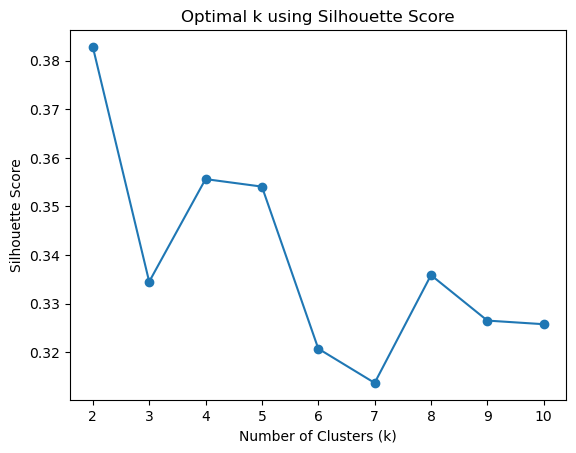

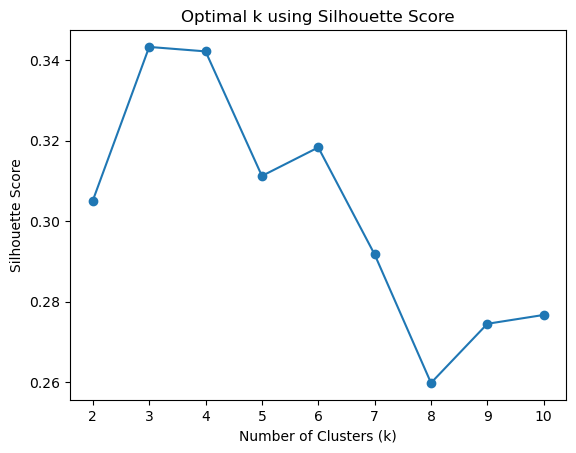

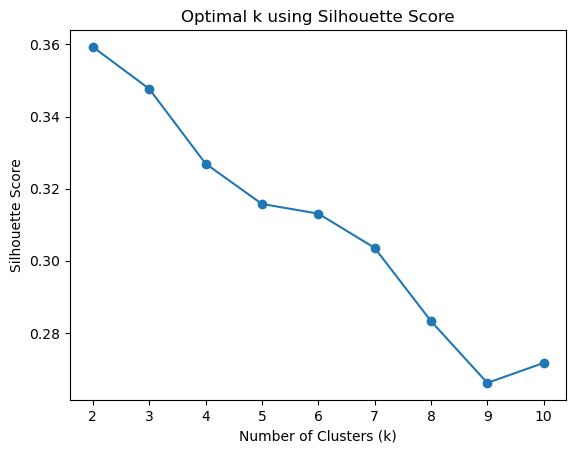

Silhouette Score for Optimized KMeans on BERT: 0.383
Silhouette Score for Optimized KMeans on TF-IDF: 0.343
Silhouette Score for Optimized KMeans on Combined Features: 0.359


In [97]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import umap
import matplotlib.pyplot as plt

# Function to find the best k dynamically using silhouette analysis
def find_best_k(features, max_k=10):
    scores = []
    k_values = list(range(2, max_k + 1))
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, init="k-means++", max_iter=1000, tol=1e-5)
        labels = kmeans.fit_predict(features)
        score = silhouette_score(features, labels)
        scores.append(score)

    best_k = k_values[scores.index(max(scores))]  # Get k with the highest silhouette score

    # Plot silhouette scores
    plt.plot(k_values, scores, marker='o')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Optimal k using Silhouette Score")
    plt.show()

    return best_k

# UMAP dimensionality reduction
umap_reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42, init='spectral')

bert_umap = umap_reducer.fit_transform(bert_embeddings_dense)
tfidf_umap = umap_reducer.fit_transform(X_tfidf_dense)
combined_umap = umap_reducer.fit_transform(combined_features_dense)

# Find best k for each feature set
best_k_bert = find_best_k(bert_umap)
best_k_tfidf = find_best_k(tfidf_umap)
best_k_combined = find_best_k(combined_umap)

# Function to perform KMeans clustering with optimal k
def optimized_kmeans(features, k):
    kmeans = KMeans(n_clusters=k, random_state=42, init="k-means++", max_iter=1000, tol=1e-5)
    kmeans.fit(features)
    return kmeans

# Apply KMeans with the best k found
kmeans_bert = optimized_kmeans(bert_umap, best_k_bert)
kmeans_tfidf = optimized_kmeans(tfidf_umap, best_k_tfidf)
kmeans_combined = optimized_kmeans(combined_umap, best_k_combined)

# Calculate and print Silhouette Scores
sil_score_bert = silhouette_score(bert_umap, kmeans_bert.labels_)
sil_score_tfidf = silhouette_score(tfidf_umap, kmeans_tfidf.labels_)
sil_score_combined = silhouette_score(combined_umap, kmeans_combined.labels_)

print(f"Silhouette Score for Optimized KMeans on BERT: {sil_score_bert:.3f}")
print(f"Silhouette Score for Optimized KMeans on TF-IDF: {sil_score_tfidf:.3f}")
print(f"Silhouette Score for Optimized KMeans on Combined Features: {sil_score_combined:.3f}")

In [ ]:
#this was a test code to see and improve the silhouette scores

BERT Embeddings Dense: True
TF-IDF Dense: True
Combined Features Dense: True


/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


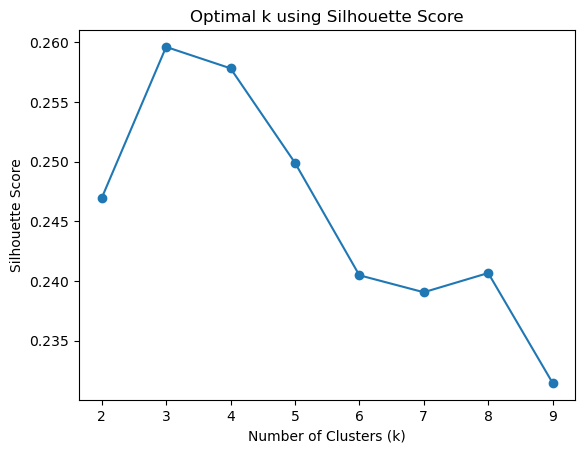

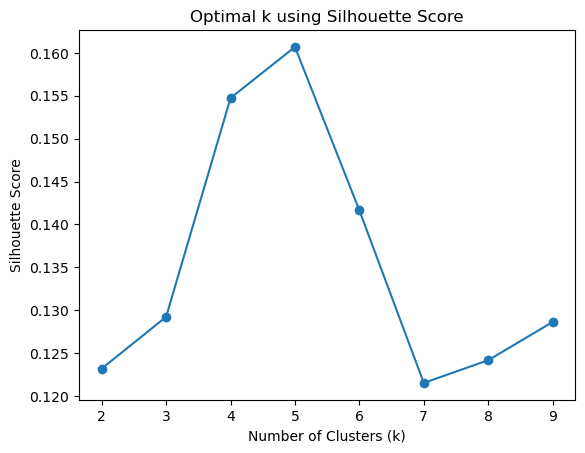

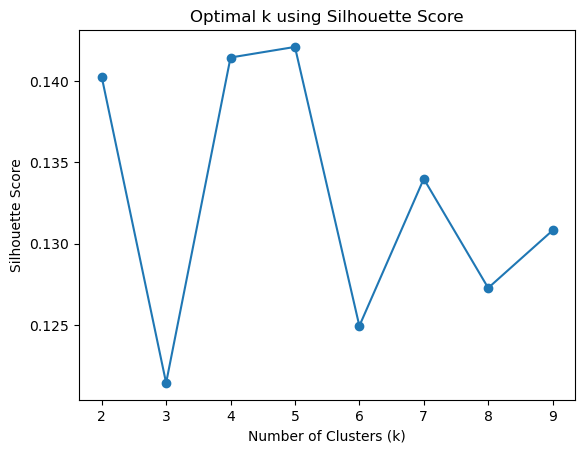

Silhouette Score for Optimized KMeans on BERT: 0.258
Silhouette Score for Optimized KMeans on TF-IDF: 0.155
Silhouette Score for Optimized KMeans on Combined Features: 0.141
HDBSCAN returned only one cluster (or only noise), silhouette score cannot be computed.


In [82]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
# from sklearn.metrics import silhouette_score
# from sklearn.preprocessing import StandardScaler
# import umap
# import hdbscan

# # ----- Feature Scaling -----
# scaler = StandardScaler()

# # Assuming bert_embeddings and X_tfidf are defined elsewhere
# bert_embeddings_scaled = scaler.fit_transform(bert_embeddings)
# X_tfidf_scaled = scaler.fit_transform(X_tfidf.toarray())  # X_tfidf is sparse, so convert it
# combined_features_scaled = scaler.fit_transform(np.hstack([X_tfidf.toarray(), bert_embeddings]))

# # ----- Convert sparse matrices to dense -----
# # Ensure that all matrices are converted to dense format before passing to UMAP
# bert_embeddings_dense = np.asarray(bert_embeddings_scaled) if isinstance(bert_embeddings_scaled, np.ndarray) else bert_embeddings_scaled.toarray()
# X_tfidf_dense = np.asarray(X_tfidf_scaled) if isinstance(X_tfidf_scaled, np.ndarray) else X_tfidf_scaled.toarray()
# combined_features_dense = np.asarray(combined_features_scaled) if isinstance(combined_features_scaled, np.ndarray) else combined_features_scaled.toarray()

# # Debugging: Check the type of the matrices to ensure they are dense
# print("BERT Embeddings Dense:", isinstance(bert_embeddings_dense, np.ndarray))
# print("TF-IDF Dense:", isinstance(X_tfidf_dense, np.ndarray))
# print("Combined Features Dense:", isinstance(combined_features_dense, np.ndarray))

# # ----- UMAP for Dimensionality Reduction (Try Reducing Components and Use Spectral Init) -----
# umap_reducer = umap.UMAP(n_components=10, metric='euclidean', random_state=42, init='spectral')  # Reduced components and changed init

# # Fit-transform all the datasets
# bert_umap = umap_reducer.fit_transform(bert_embeddings_dense)
# tfidf_umap = umap_reducer.fit_transform(X_tfidf_dense)
# combined_umap = umap_reducer.fit_transform(combined_features_dense)

# # ----- Find Best k for KMeans -----
# def find_best_k(features, max_k=10):
#     scores = []
#     for k in range(2, max_k):
#         kmeans = KMeans(n_clusters=k, random_state=42, init="k-means++", max_iter=1000, tol=1e-5)
#         labels = kmeans.fit_predict(features)
#         score = silhouette_score(features, labels)
#         scores.append(score)
    
#     plt.plot(range(2, max_k), scores, marker='o')
#     plt.xlabel("Number of Clusters (k)")
#     plt.ylabel("Silhouette Score")
#     plt.title("Optimal k using Silhouette Score")
#     plt.show()

# # Find best k before clustering
# find_best_k(bert_umap)
# find_best_k(tfidf_umap)
# find_best_k(combined_umap)

# # ----- Optimized KMeans Clustering -----
# def optimized_kmeans(features):
#     best_k = 4  # Update based on `find_best_k()` results
#     kmeans = KMeans(n_clusters=best_k, random_state=42, init="k-means++", max_iter=1000, tol=1e-5)
#     kmeans.fit(features)
#     return kmeans

# kmeans_bert = optimized_kmeans(bert_umap)
# kmeans_tfidf = optimized_kmeans(tfidf_umap)
# kmeans_combined = optimized_kmeans(combined_umap)

# # Calculate Silhouette Scores
# sil_score_bert = silhouette_score(bert_umap, kmeans_bert.labels_)
# sil_score_tfidf = silhouette_score(tfidf_umap, kmeans_tfidf.labels_)
# sil_score_combined = silhouette_score(combined_umap, kmeans_combined.labels_)

# # Print rounded Silhouette Scores with formatting
# print(f"Silhouette Score for Optimized KMeans on BERT: {sil_score_bert:.3f}")
# print(f"Silhouette Score for Optimized KMeans on TF-IDF: {sil_score_tfidf:.3f}")
# print(f"Silhouette Score for Optimized KMeans on Combined Features: {sil_score_combined:.3f}")


# # ----- HDBSCAN Clustering and Silhouette Score Calculation -----
# hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean')
# hdbscan_labels = hdbscan_cluster.fit_predict(combined_umap)

# # Check if HDBSCAN has returned more than one cluster or noise points (-1)
# unique_labels = np.unique(hdbscan_labels)
# num_clusters = len(unique_labels)

# # Check if there are at least two clusters (excluding noise, which is labeled as -1)
# if num_clusters > 1 and (num_clusters != 2 or -1 in unique_labels):  # at least 2 clusters including noise (-1)
#     try:
#         sil_score_hdbscan = silhouette_score(combined_umap, hdbscan_labels)
#         print(f"Silhouette Score for HDBSCAN: {round(sil_score_hdbscan, 3)}")
#     except ValueError:
#         print("HDBSCAN failed to compute silhouette score due to only one cluster (or noise).")
# else:
#     print("HDBSCAN returned only one cluster (or only noise), silhouette score cannot be computed.")

# # # ----- Alternative Clustering: Spectral & Agglomerative -----
# # spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
# # spectral_labels = spectral.fit_predict(combined_umap)

# # agglomerative = AgglomerativeClustering(n_clusters=4, linkage='ward')
# # agglomerative_labels = agglomerative.fit_predict(combined_umap)

# # # Silhouette Scores for Alternative Methods
# # sil_score_spectral = silhouette_score(combined_umap, spectral_labels)
# # sil_score_agglomerative = silhouette_score(combined_umap, agglomerative_labels)

# # print(f"Silhouette Score for Spectral Clustering: {round(sil_score_spectral, 3)}")
# # print(f"Silhouette Score for Agglomerative Clustering: {round(sil_score_agglomerative, 3)}")
